<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Segunda (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 22/10/2019 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Tópico 0">Questão 1</a></li>
        <li><a href="#Tópico 1">Questão 2</a></li>
        <li><a href="#Tópico 2">Questão 3</a></li>
        <li><a href="#Tópico 3">Questão 4</a></li>

</ol>
</div>


In [1]:
from utils import *
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

# Ticker Fetching

In [2]:
ticker_list = ['USIM5.SA', 'GOAU4.SA', 'ENBR3.SA','ELET3.SA', 'BRML3.SA']
all_data = get_tickers(ticker_list,
                       startdate=(datetime.datetime.today() - datetime.timedelta(days=365*3)) )

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


# Rolling Average

<div id="Tópico 0">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 1:</h></a></h>   Implemente uma estratégia de trade automático baseado em duas médias móveis e verifique o desempenho quanto ao Índice Sharpe. Utilize um período mínimo de 3 anos e os 5 (cinco) ativos escolhidos na primeira avaliação.
 
</div> </div> </div> 


In [3]:
profit_rollingavg, percentage_rollingavg, buys_rollingavg, sells_rollingavg, temporal_series_rollingavg = simulate_rolling_avg_trading(all_data, 'GOAU4.SA', rolling_window=6, gain=1, loss=0.001, initial_value=12345)
print("Rolling Average")
print("Profit:", profit_rollingavg)
print("Percentage:", percentage_rollingavg)
print("Buys/Sells:", buys_rollingavg, sells_rollingavg)

Rolling Average
Profit: 4267.530000000024
Percentage: 34.568894289186105
Buys/Sells: 80 80


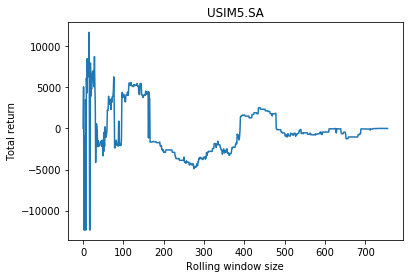

Window with max return: 15 with profit 11703.249999999996


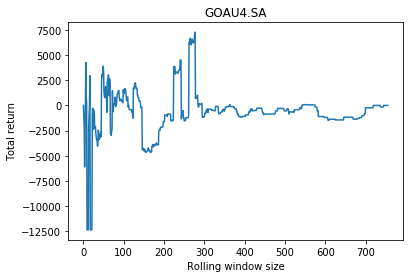

Window with max return: 276 with profit 7259.310000000009


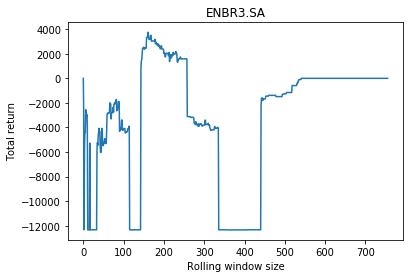

Window with max return: 161 with profit 3753.6899999999987


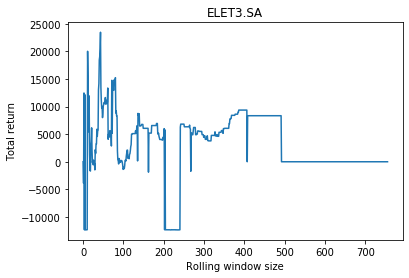

Window with max return: 43 with profit 23455.46


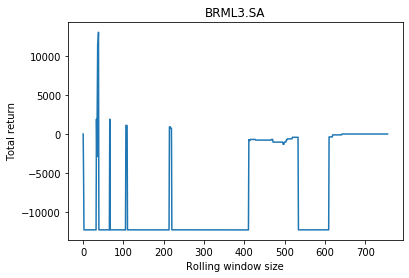

Window with max return: 38 with profit 13098.869999999999


In [4]:
for ticker in ticker_list:
    ra_brute_force = []
    for i in range(252*3):
        profit_rollingavg, percentage_rollingavg, buys_rollingavg, sells_rollingavg, temporal_series_rollingavg = simulate_rolling_avg_trading(all_data, ticker, rolling_window=i, gain=0.5, loss=0.001, initial_value=12345)
        ra_brute_force.append((profit_rollingavg, i))
        
    plt.plot([a[0] for a in ra_brute_force])
    plt.title(ticker)
    plt.ylabel("Total return")
    plt.xlabel("Rolling window size")
    plt.show()
    
    ra_brute_force = sorted(ra_brute_force, key=lambda x: -x[0])
    print("Window with max return: {0} with profit {1}".format(ra_brute_force[0][1], ra_brute_force[0][0]))

# MACD

<div id="Tópico 1">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 2:</h></a></h>  Implemente uma estratégia de trade automático baseado em duas médias móveis anterior, adicionando à aplicação o RSI ou MACD. Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.
  
</div> </div> 

In [5]:
profit_macd, percentage_macd, buys_macd, sells_macd, temporal_series_macd = simulate_macd_avg_trading(all_data, 'GOAU4.SA',short_window=5, long_window=6, gain=1, loss=1, initial_value=1245)
print("MACD")
print("Profit:", profit_macd)
print("Percentage:", percentage_macd)
print("Buys/Sells:", buys_macd, sells_macd)

MACD
Profit: -11.410000000000082
Percentage: -0.9164658634538192
Buys/Sells: 1 1


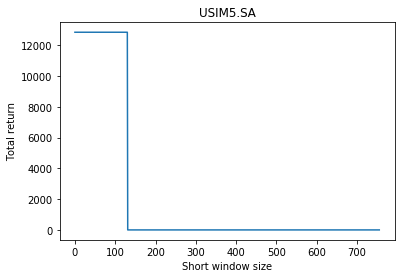

Short window with max return: 0 with profit 12845.549999999996


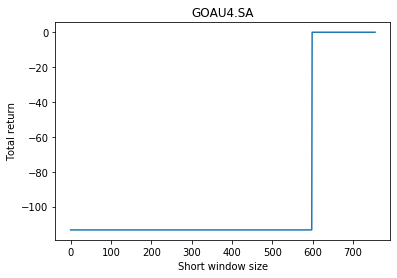

Short window with max return: 599 with profit 0


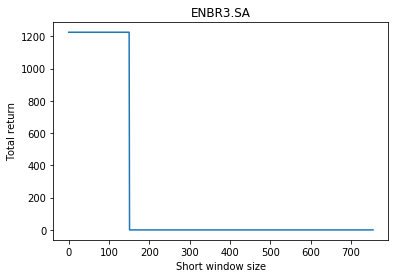

Short window with max return: 0 with profit 1225.3600000000024


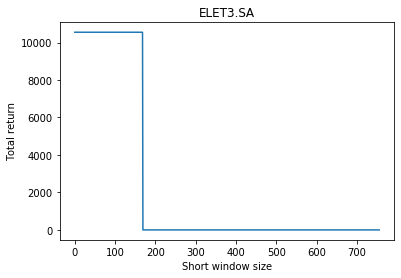

Short window with max return: 0 with profit 10549.5


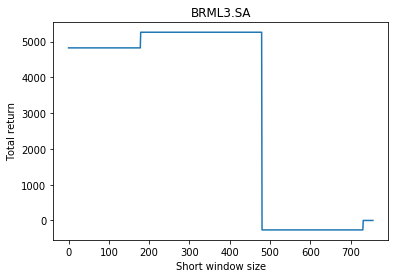

Short window with max return: 179 with profit 5262.170000000002


In [6]:
for ticker in ticker_list:
    macd_brute_force = []
    for i in range(252*3):
        profit_macd, percentage_macd, buys_macd, sells_macd, temporal_series_macd = simulate_macd_avg_trading(all_data, ticker, short_window=i, long_window=2*i, gain=1, loss=1, initial_value=12345)
        macd_brute_force.append((profit_macd, i))

    plt.plot([a[0] for a in macd_brute_force])
    plt.title(ticker)
    plt.ylabel("Total return")
    plt.xlabel("Short window size")
    plt.show()

    macd_brute_force = sorted(macd_brute_force, key=lambda x: -x[0])
    print("Short window with max return: {0} with profit {1}".format(macd_brute_force[0][1], macd_brute_force[0][0]))

# Palex Setup 9.1

<div id="Tópico 2">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 3:</h></a></h> Escolha uma estratégia de trade automático de contra tendência, apresentada na Referência Palex . Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.  
</div> </div> 

In [7]:
profit_palex_9_1, percentage_palex_9_1, buys_palex_9_1, sells_palex_9_1, temporal_series_palex_9_1 = simulate_palex_9_1(all_data, 'GOAU4.SA', gain=0.5, down_len=5, initial_value=12345)
print("Palex 9.1")
print("Profit:", profit_palex_9_1)
print("Percentage:", percentage_palex_9_1)
print("Buys/Sells:", buys_palex_9_1, sells_palex_9_1)

Palex 9.1
Profit: -2379.780000000006
Percentage: -19.27727825030382
Buys/Sells: 177 177


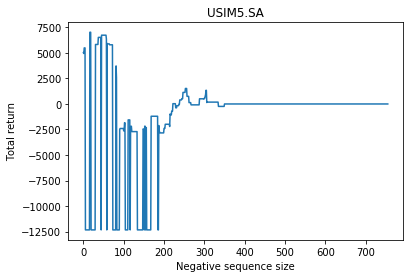

Sequence with max return: 16 with profit 7026.220000000019


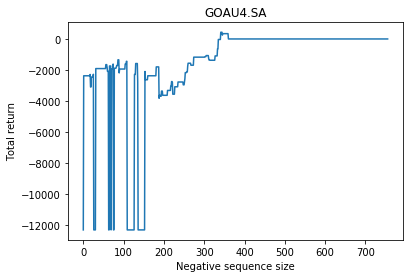

Sequence with max return: 341 with profit 433.71999999999935


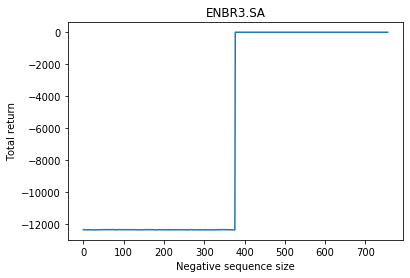

Sequence with max return: 377 with profit 0


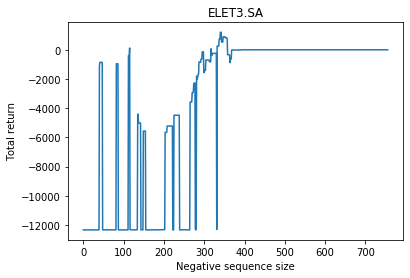

Sequence with max return: 340 with profit 1200.2800000000097


In [ ]:
for ticker in ticker_list:
    palex_brute_force = []
    for i in range(252*3):
        profit_palex_9_1, percentage_palex_9_1, buys_palex_9_1, sells_palex_9_1, temporal_series_palex_9_1 = simulate_palex_9_1(all_data, ticker, gain=0.5, down_len=i, initial_value=12345)
        palex_brute_force.append((profit_palex_9_1, i))
        
    plt.plot([a[0] for a in palex_brute_force])
    plt.title(ticker)
    plt.ylabel("Total return")
    plt.xlabel("Negative sequence size")
    plt.show()

    palex_brute_force = sorted(palex_brute_force, key=lambda x: -x[0])
    print("Sequence with max return: {0} with profit {1}".format(palex_brute_force[0][1], palex_brute_force[0][0]))

<div id="Tópico 3">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 4: </h></a></h>Compare os resultados das três estrategias de trades, quanto: a) Retorno de Capital, b) Número de Trades, c) Taxa de Acertos, d) Fator de Lucro, e) Índice Sharpe e o f) retorno dos ativos avaliados na condição buy&hold.   
</div> </div> 

In [ ]:
a=1